In [46]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [47]:
# Load the data into a Pandas DataFrame
file_path = "resources/crypto_market_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Display summary statistics
print(df.describe())


        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_percentage_200d  \
0                     -3.25185                      83.51840   
1                    -12.88890      

In [48]:
# Generate summary statistics
df.describe()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [49]:
# Plot your data to see what's in your DataFrame
df.hvplot.line(
    width=800,
    height=400,
    rot=90
)


:NdOverlay   [Variable]
   :Curve   [index]   (value)

---

### Prepare the Data

In [50]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

# Select only the numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_scaled = scaler.fit_transform(df[numeric_columns])


In [51]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(df_scaled, columns=numeric_columns)

# Copy the crypto names from the original DataFrame
df_scaled["coin_id"] = df["coin_id"]  

# Set the coin_id column as index
df_scaled.set_index("coin_id", inplace=True)

# Display the scaled DataFrame
print(df_scaled.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [52]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [53]:
# Create an empty list to store inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # 1. Create a KMeans model using the loop counter for n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using df_scaled
    kmeans.fit(df_scaled)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Print the inertia values for each k
print(inertia)



c:\Users\Mrod9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Mrod9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Mrod9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Mrod9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[287.0, 212.1233420748626, 170.19357087970297, 79.02243535120975, 71.09791351244418, 66.1088267804475, 54.488123156241166, 43.22469266658042, 32.86088447122681, 28.404884636873092, 24.116198421409198]


c:\Users\Mrod9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Mrod9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [54]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": list(range(1, 12)), "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

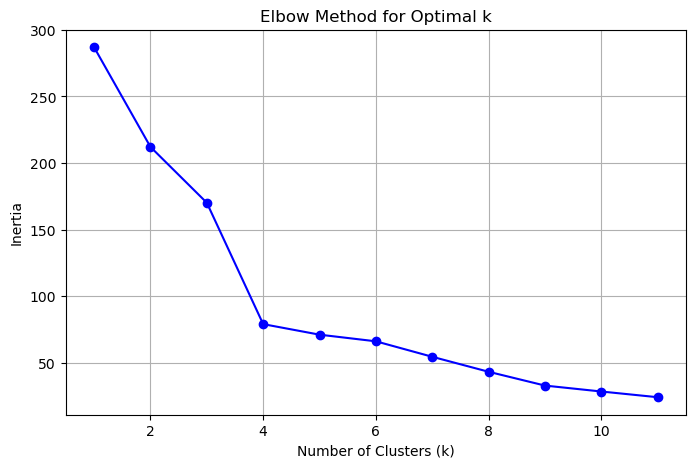

In [55]:
# Plot the Elbow Curve using the dictionary created earlier
plt.figure(figsize=(8, 5))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker="o", linestyle="-", color="b")

# Adding labels and title to the plot
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)

# Show the plot
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:  The best value for k is 4, as this is the point where the inertia decreases sharply and then starts to level off.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [57]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)

In [58]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_scaled)

c:\Users\Mrod9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [59]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_predictions = kmeans.predict(df_scaled)

# Print the resulting array of cluster values
print(cluster_predictions)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [60]:
# Create a copy of the scaled DataFrame
df_scaled_copy = df_scaled.copy()

# Add the predicted cluster labels to the copy
df_scaled_copy['cluster'] = cluster_predictions

# Display the first few rows of the new DataFrame with cluster labels
print(df_scaled_copy.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [61]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_scaled_copy['cluster'] = cluster_predictions

# Display the copy of the scaled DataFrame with the added cluster column
print(df_scaled_copy.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [62]:
# Create the scatter plot with the specified columns and clusters
scatter_plot = df_scaled_copy.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    c='cluster',               
    colormap='viridis',        
    hover_cols=['coin_id'],    
    title="Cryptocurrency Clusters based on Price Changes",
    width=800,
    height=500
)

# Display the plot
scatter_plot



:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [63]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3, random_state=42)

In [64]:
# Use the PCA model with fit_transform to reduce the original scaled DataFrame to 3 principal components
pca_data = pca.fit_transform(df_scaled)

# Create a new DataFrame with the PCA-transformed data
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Set the coin_id as the index for the new DataFrame
df_pca.index = df_scaled.index

# Display the first few rows of the scaled PCA data
print(df_pca.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [65]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for each principal component
print("Explained Variance Ratio for each Principal Component:")
print(explained_variance)

# Calculate the total explained variance by summing the individual explained variances
total_explained_variance = explained_variance.sum()

# Print the total explained variance
print("\nTotal Explained Variance (for the first 3 components):", total_explained_variance)


Explained Variance Ratio for each Principal Component:
[0.3719856  0.34700813 0.17603793]

Total Explained Variance (for the first 3 components): 0.8950316570309841


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer: The total explained variance of the three principal components is approximately 0.895 (or 89.5%). This means that the first three principal components explain 89.5% of the total variance in the data.

In [66]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original scaled DataFrame
df_pca['coin_id'] = df_scaled.index

# Set the coin_id column as index
df_pca.index = df_scaled.index

# Display the scaled PCA DataFrame
print(df_pca.head())


                   PC1       PC2       PC3       coin_id
coin_id                                                 
bitcoin      -0.600667  0.842760  0.461595       bitcoin
ethereum     -0.458261  0.458466  0.952877      ethereum
tether       -0.433070 -0.168126 -0.641752        tether
ripple       -0.471835 -0.222660 -0.479053        ripple
bitcoin-cash -1.157800  2.041209  1.859715  bitcoin-cash


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [67]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [68]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the current value of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data using the scaled PCA DataFrame
    kmeans.fit(df_pca[['PC1', 'PC2', 'PC3']])
    
    # Append the inertia value (sum of squared distances) to the inertia list
    inertia_values.append(kmeans.inertia_)


c:\Users\Mrod9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Mrod9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Mrod9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Mrod9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [69]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia_values
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

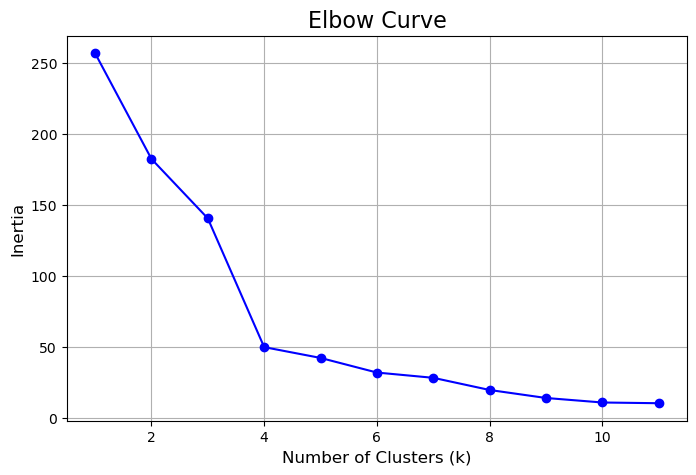

In [70]:
# Plot the elbow curve using the elbow_df DataFrame
plt.figure(figsize=(8, 5))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker="o", linestyle="-", color="b")

# Adding labels and title to the plot
plt.title("Elbow Curve", fontsize=16)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)

# Display the plot
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer: The best value for k when using the PCA data is 4. This was determined by inspecting the elbow curve, where the inertia begins to decrease at a slower rate after k = 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer: No, the best value for k does not differ from the best k found using the original data. Both the original data and the PCA data suggest that the optimal number of clusters is 4.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [71]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=42)

In [ ]:
# Drop the 'coin_id' column from the df_pca DataFrame
df_pca_numeric = df_pca.drop(columns=['coin_id'])

# Fit the K-Means model using the PCA data
kmeans_pca.fit(df_pca_numeric)



[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


c:\Users\Mrod9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [76]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
clusters_pca = kmeans_pca.predict(df_pca_numeric)

# Print the resulting array of cluster values
print(clusters_pca)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [77]:
# Create a copy of the scaled PCA DataFrame
df_pca_copy = df_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_copy['cluster'] = clusters_pca

# Display the copy of the scaled PCA DataFrame with the new 'cluster' column
print(df_pca_copy.head())


                   PC1       PC2       PC3       coin_id  cluster
coin_id                                                          
bitcoin      -0.600667  0.842760  0.461595       bitcoin        0
ethereum     -0.458261  0.458466  0.952877      ethereum        0
tether       -0.433070 -0.168126 -0.641752        tether        2
ripple       -0.471835 -0.222660 -0.479053        ripple        2
bitcoin-cash -1.157800  2.041209  1.859715  bitcoin-cash        0


In [78]:
# Add the 'coin_id' column from the original DataFrame (assuming you have the 'coin_id' in df_scaled)
df_pca_copy['coin_id'] = df_scaled.index

# Create a scatter plot using hvPlot
scatter_plot = df_pca_copy.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    c='cluster',  # Color the points by the cluster labels
    hover_cols=['coin_id'],  # Add 'coin_id' to the hover columns
    cmap='viridis',  # Optional: Customize color map
    title="Cryptocurrency Clusters (PCA)",  # Optional: Add a title
    height=400,  # Optional: Set height of the plot
    width=800,   # Optional: Set width of the plot
)

# Display the plot
scatter_plot


:Scatter   [PC1]   (PC2,cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [85]:
# Drop the non-numeric 'coin_id' column from df_pca (if it's included)
df_pca_numeric = df_pca.drop(columns=['coin_id'])

# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_pca = []

# Loop over the range of k-values
for k in k_values_pca:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(df_pca_numeric)  # Fit the K-Means model on PCA data (only numeric)
    inertia_pca.append(kmeans_pca.inertia_)  # Append the inertia value to the list

# Create a DataFrame with the inertia values
elbow_df_pca = pd.DataFrame({
    'k': k_values_pca,
    'inertia': inertia_pca
})

# Display the elbow_df_pca DataFrame
print(elbow_df_pca)


c:\Users\Mrod9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Mrod9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Mrod9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Mrod9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

     k     inertia
0    1  256.874086
1    2  182.339530
2    3  140.431833
3    4   49.665497
4    5   42.051901
5    6   31.749005
6    7   28.031869
7    8   19.451747
8    9   13.814082
9   10   10.630648
10  11   10.120243


c:\Users\Mrod9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Mrod9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


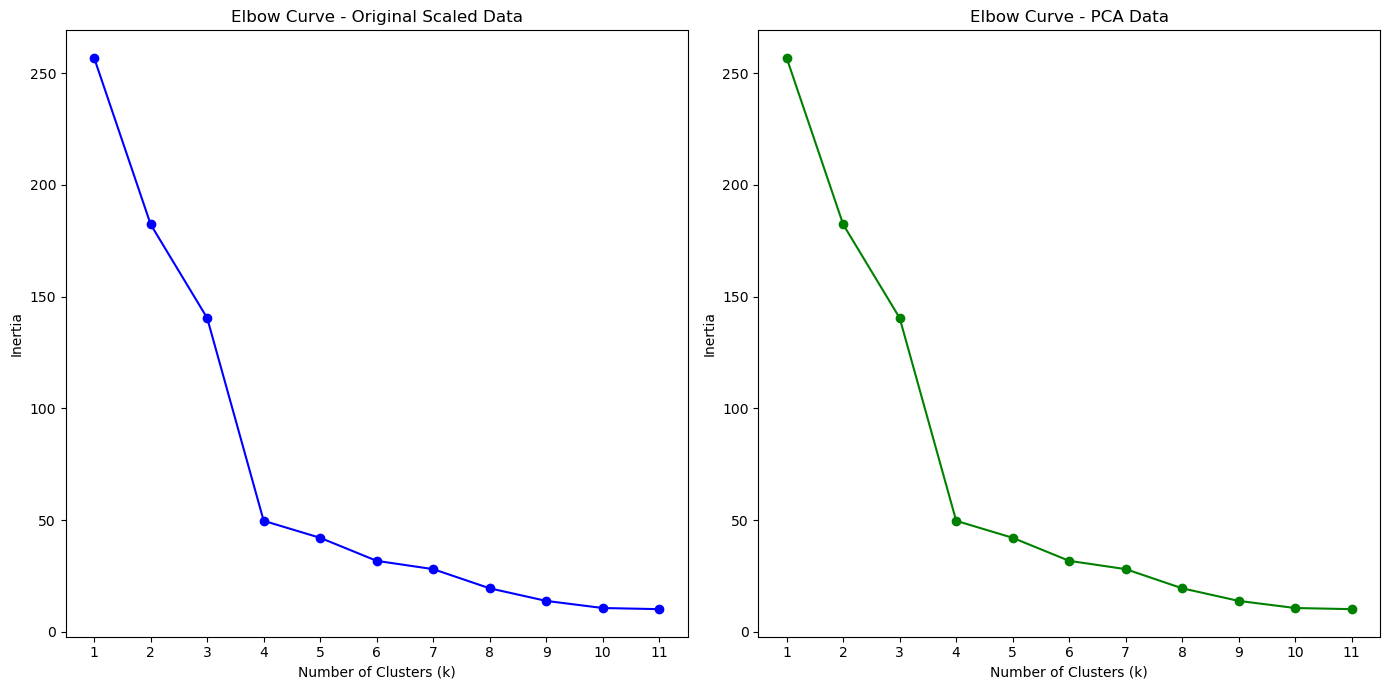

In [86]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(14, 7))

# Plot for original scaled data
plt.subplot(1, 2, 1)
plt.plot(elbow_df["k"], elbow_df["inertia"], marker="o", linestyle="-", color="b")
plt.title("Elbow Curve - Original Scaled Data")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(range(1, 12))

# Plot for PCA data
plt.subplot(1, 2, 2)
plt.plot(elbow_df_pca["k"], elbow_df_pca["inertia"], marker="o", linestyle="-", color="g")
plt.title("Elbow Curve - PCA Data")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(range(1, 12))

# Display the composite plot
plt.tight_layout()
plt.show()


c:\Users\Mrod9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Mrod9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


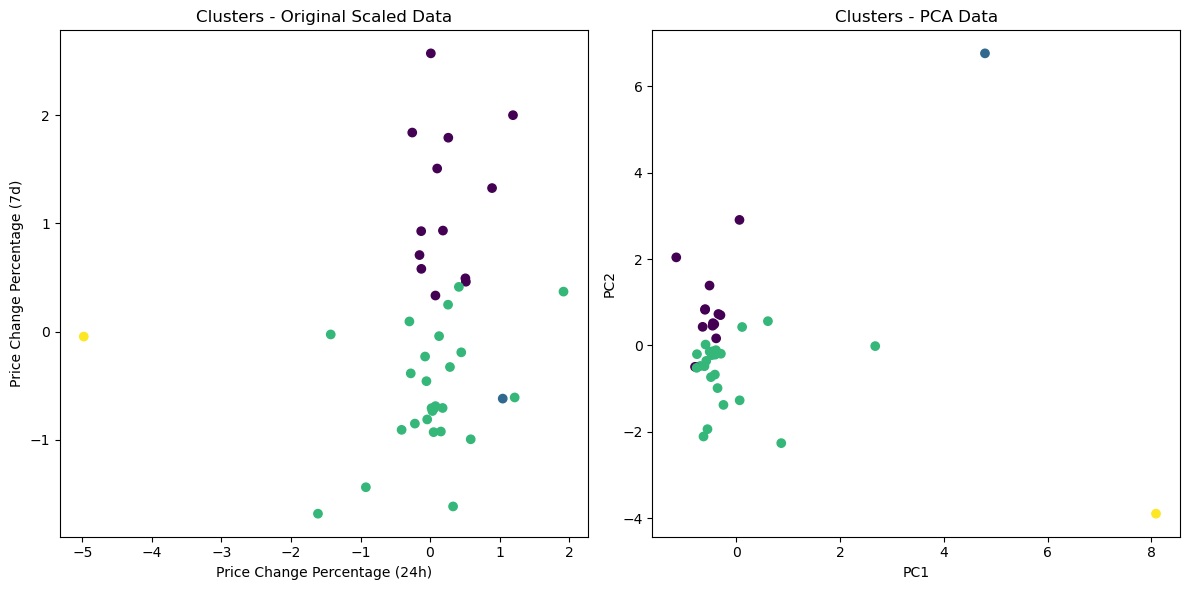

In [88]:
# Composite plot to contrast the clusters
# Fit the KMeans model using the original scaled DataFrame
kmeans = KMeans(n_clusters=4, random_state=42)  # Use the best k (4) as determined earlier
kmeans.fit(df_scaled)

# Predict the clusters
clusters = kmeans.predict(df_scaled)

# Plot the clusters for the original scaled data
plt.figure(figsize=(12, 6))

# Plot for original scaled data
plt.subplot(1, 2, 1)
plt.scatter(df_scaled['price_change_percentage_24h'], df_scaled['price_change_percentage_7d'], 
            c=clusters, cmap='viridis', label='Clusters')
plt.title("Clusters - Original Scaled Data")
plt.xlabel("Price Change Percentage (24h)")
plt.ylabel("Price Change Percentage (7d)")

# Plot for PCA data (same steps for PCA data, assuming you have the `df_pca` DataFrame and clusters from PCA)
kmeans_pca = KMeans(n_clusters=4, random_state=42)  # Use the best k (4) from PCA analysis
kmeans_pca.fit(df_pca.drop(columns=['coin_id']))  # Make sure to drop non-numeric columns (like 'coin_id')
clusters_pca = kmeans_pca.predict(df_pca.drop(columns=['coin_id']))  # Predict the clusters for PCA data

# Plot for PCA data
plt.subplot(1, 2, 2)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=clusters_pca, cmap='viridis', label='Clusters')
plt.title("Clusters - PCA Data")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Show the plot
plt.tight_layout()
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer: Using fewer features for clustering with K-Means can simplify the analysis and improve visualization, but it may also lead to a loss of important information, potentially affecting cluster quality. Dimensionality reduction (like PCA) helps retain the most significant variance, improving cluster separation and computation speed, but can make interpretation more difficult since the reduced features don't directly map to the original ones. The key is balancing efficiency with retaining essential information.